<a href="https://colab.research.google.com/github/arunabh789/Deep-Learning-Edlightened/blob/main/DL_Live_project_arunabh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# read the data file
dataset = pd.read_excel("Marketing_FMCG.xlsx")
# Check is the data is properly loaded
dataset.head()

,Age,Refrigerator,TV,Distance from Store,Self or Delivered,Purchase Date,Amount Spent on Refrigerator,Purchase Date.1,Amount Spent on TV,Warranty Status,Location of Sale,Total Spend,Customer Acquisition Cost,High or Low Priority
0,26,Whirlpool,LG,0.849305,Delivered,2023-03-16,44821,2022-11-09,64493,Y,Delhi,109314,7146,H
1,44,Lloyds,Samsung,2.952298,Delivered,2022-05-20,29194,2022-01-15,70121,Y,Gurugram,99315,14766,L
2,24,Bosch,Sony,3.674382,Self,2022-10-01,31286,2023-03-22,93128,Y,Jalandhar,124414,7690,L
3,28,Samsung,Sony,1.643220,Delivered,2022-01-20,30857,2022-06-02,44455,Y,Chandigarh,75312,11861,H
4,58,LG,Samsung,1.637641,Self,2022-12-12,44960,2023-10-11,69942,Y,Delhi,114902,9215,H


In [ ]:
# Basic information about the dataset
basic_info = dataset.info()

# Preview the first few rows of the dataset
preview = dataset.head()

basic_info, preview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Age                           50000 non-null  int64         
 1   Refrigerator                  50000 non-null  object        
 2   TV                            50000 non-null  object        
 3   Distance from Store           50000 non-null  float64       
 4   Self or Delivered             50000 non-null  object        
 5   Purchase Date                 50000 non-null  datetime64[ns]
 6   Amount Spent on Refrigerator  50000 non-null  int64         
 7   Purchase Date.1               50000 non-null  datetime64[ns]
 8   Amount Spent on TV            50000 non-null  int64         
 9   Warranty Status               50000 non-null  object        
 10  Location of Sale              50000 non-null  object        
 11  Total Spend                 

(None,
    Age Refrigerator       TV  Distance from Store Self or Delivered  \
 0   26    Whirlpool       LG             0.849305         Delivered   
 1   44       Lloyds  Samsung             2.952298         Delivered   
 2   24        Bosch     Sony             3.674382              Self   
 3   28      Samsung     Sony             1.643220         Delivered   
 4   58           LG  Samsung             1.637641              Self   
 
   Purchase Date  Amount Spent on Refrigerator Purchase Date.1  \
 0    2023-03-16                         44821      2022-11-09   
 1    2022-05-20                         29194      2022-01-15   
 2    2022-10-01                         31286      2023-03-22   
 3    2022-01-20                         30857      2022-06-02   
 4    2022-12-12                         44960      2023-10-11   
 
    Amount Spent on TV Warranty Status Location of Sale  Total Spend  \
 0               64493               Y            Delhi       109314   
 1               

In [ ]:
# Summary statistics of the numerical columns
summary_statistics = dataset.describe()

# Summary statistics for numerical columns
summary_statistics


,Age,Distance from Store,Amount Spent on Refrigerator,Amount Spent on TV,Total Spend,Customer Acquisition Cost
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.022340,2.000169,52557.123640,62628.636980,115185.760620,9517.826460
std,12.420902,1.154223,15849.932815,21629.062704,26816.272964,3168.780231
min,23.000000,0.000016,25000.000000,25001.000000,50366.000000,4000.000000
25%,33.000000,0.997595,38804.250000,43927.000000,95701.750000,6781.750000
50%,44.000000,2.005005,52696.000000,62759.000000,115285.000000,9527.000000
75%,55.000000,2.991248,66220.250000,81345.250000,134729.250000,12257.000000
max,65.000000,3.999955,80000.000000,100000.000000,179761.000000,15000.000000


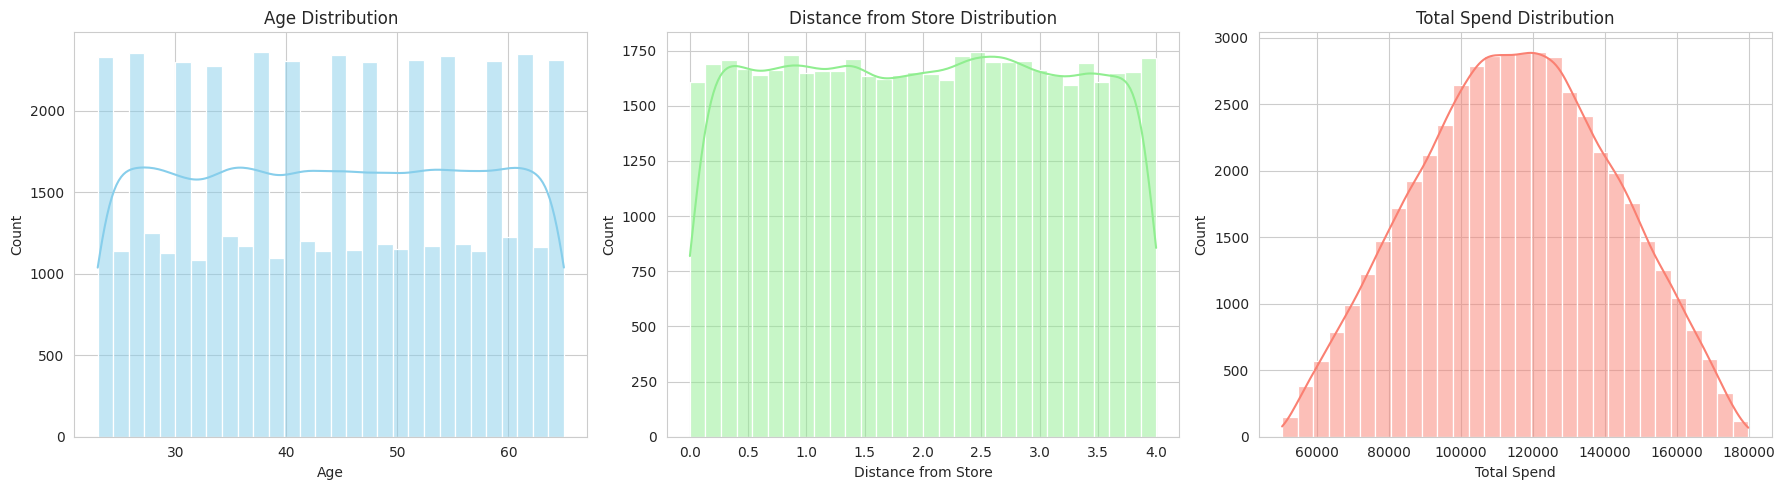

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure to hold the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting distributions
sns.histplot(dataset['Age'], bins=30, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Age Distribution')

sns.histplot(dataset['Distance from Store'], bins=30, ax=axes[1], kde=True, color='lightgreen')
axes[1].set_title('Distance from Store Distribution')

sns.histplot(dataset['Total Spend'], bins=30, ax=axes[2], kde=True, color='salmon')
axes[2].set_title('Total Spend Distribution')

plt.tight_layout()
plt.show()


<ipython-input-153-1b60b7eb9083>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Spend', y='Location of Sale', data=sales_performance, palette='coolwarm')


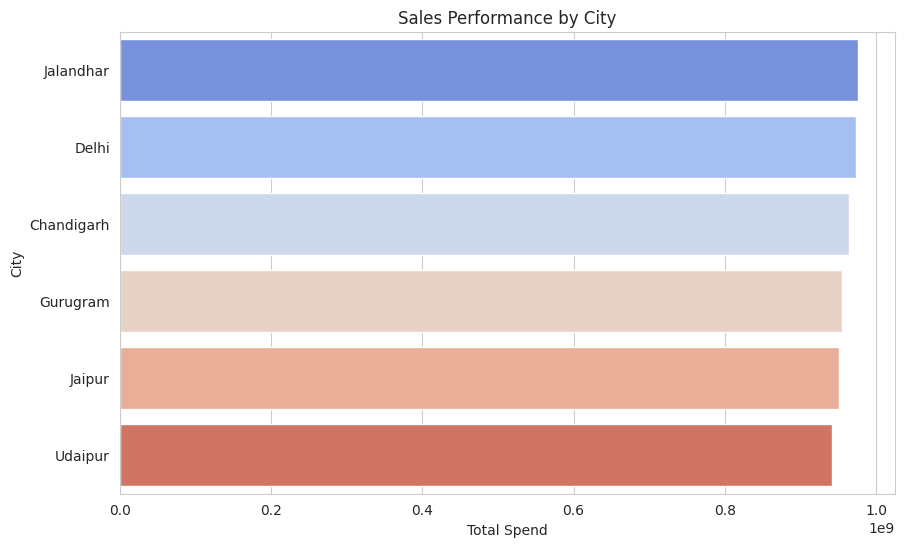

,Location of Sale,Total Spend
4,Jalandhar,975582448
1,Delhi,973046891
0,Chandigarh,964085967
2,Gurugram,954195654
3,Jaipur,951443506
5,Udaipur,940933565


In [ ]:
# Grouping the data by 'Location of Sale' and calculating the sum of 'Total Spend' for each location
sales_performance = dataset.groupby('Location of Sale')['Total Spend'].sum().reset_index()

# Sorting the locations by 'Total Spend' in descending order
sales_performance = sales_performance.sort_values(by='Total Spend', ascending=False)

# Visualizing the sales performance by location
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Spend', y='Location of Sale', data=sales_performance, palette='coolwarm')
plt.title('Sales Performance by City')
plt.xlabel('Total Spend')
plt.ylabel('City')
plt.show()

sales_performance


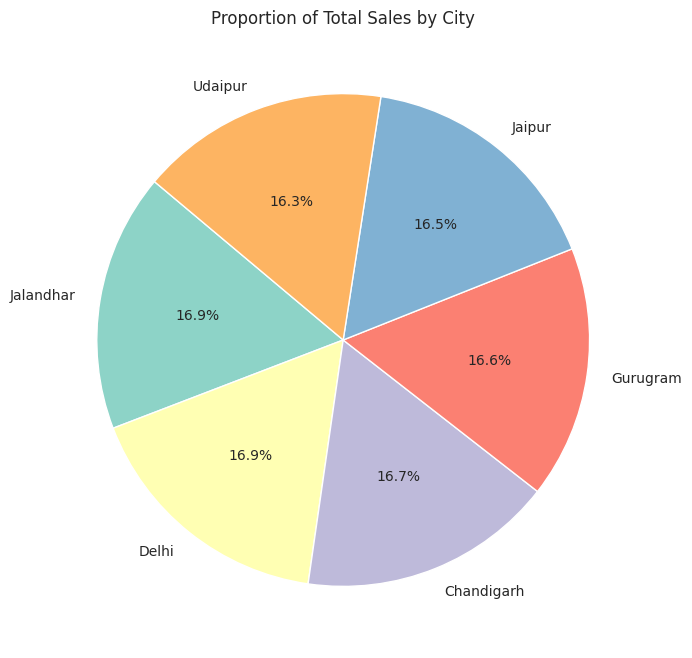

In [ ]:
# Creating a pie chart to visualize the proportion of total sales by city
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sales_performance['Total Spend'], labels=sales_performance['Location of Sale'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', n_colors=len(sales_performance)))
ax.set_title('Proportion of Total Sales by City')
plt.show()


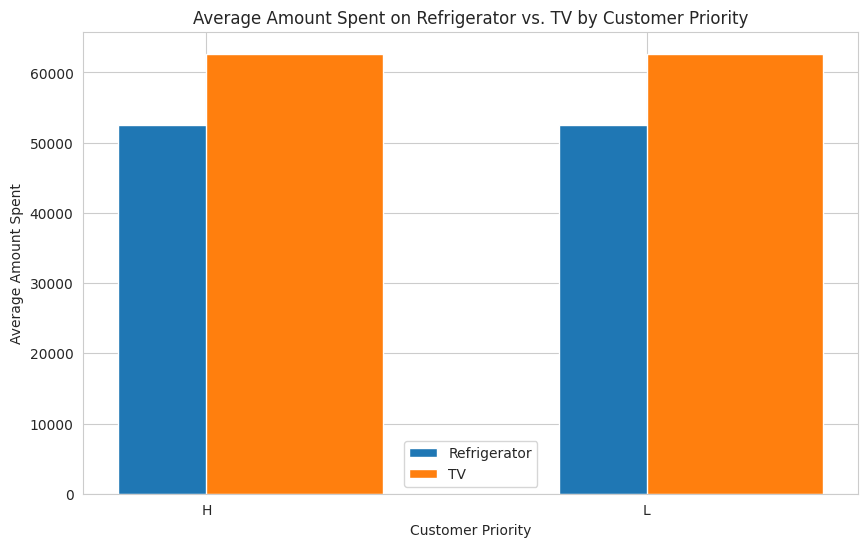

,High or Low Priority,Amount Spent on Refrigerator,Amount Spent on TV
0,H,52552.392231,62584.452979
1,L,52561.863005,62672.895272


In [ ]:
# Visualizing the average amount spent on Refrigerator and TV by High and Low priority customers
avg_spend_by_priority = dataset.groupby('High or Low Priority').agg({'Amount Spent on Refrigerator': 'mean', 'Amount Spent on TV': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
x = range(len(avg_spend_by_priority['High or Low Priority']))
plt.bar(x, avg_spend_by_priority['Amount Spent on Refrigerator'], width=0.4, label='Refrigerator', align='center')
plt.bar(x, avg_spend_by_priority['Amount Spent on TV'], width=0.4, label='TV', align='edge')

plt.xlabel('Customer Priority')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent on Refrigerator vs. TV by Customer Priority')
plt.xticks(x, avg_spend_by_priority['High or Low Priority'])
plt.legend()
plt.show()

avg_spend_by_priority


In [ ]:
# prompt: install terasflow

!pip install tensorflow


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
# Assuming 'dataset' is your DataFrame

# Preprocess dataset
X = dataset.drop('High or Low Priority', axis=1)
y = dataset['High or Low Priority'].map({'H': 1, 'L': 0})  # Convert to binary

categorical_features = ['Refrigerator', 'TV', 'Self or Delivered', 'Warranty Status', 'Location of Sale']
numerical_features = ['Age', 'Distance from Store', 'Amount Spent on Refrigerator', 'Amount Spent on TV', 'Total Spend', 'Customer Acquisition Cost']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Build and compile model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')


Epoch 1/10
1000/1000 [==============================] - 7s 4ms/step - loss: 0.6956 - accuracy: 0.5024 - val_loss: 0.6948 - val_accuracy: 0.4955
Epoch 2/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6932 - accuracy: 0.5123 - val_loss: 0.6951 - val_accuracy: 0.4921
Epoch 3/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6920 - accuracy: 0.5185 - val_loss: 0.6951 - val_accuracy: 0.4989
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6914 - accuracy: 0.5250 - val_loss: 0.6947 - val_accuracy: 0.5029
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6903 - accuracy: 0.5331 - val_loss: 0.6953 - val_accuracy: 0.5001
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6896 - accuracy: 0.5329 - val_loss: 0.6969 - val_accuracy: 0.5006
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6886 - accuracy: 0.5370 - val_loss: 0.6977 - val_accuracy:

313/313 [==============================] - 1s 2ms/step
[[2682 2292]
 [2618 2408]]


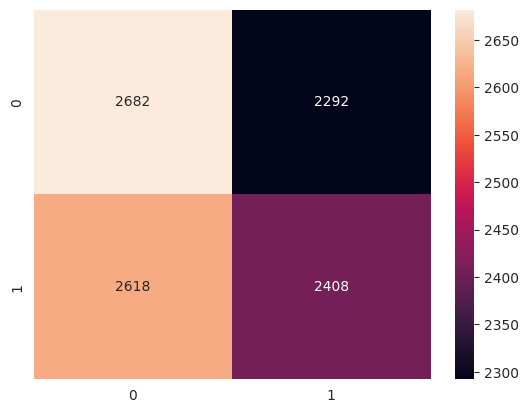

In [ ]:
# prompt: make confusion matrix

from sklearn.metrics import confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary labels
y_pred_binary = [int(round(p[0])) for p in y_pred]

# Compute confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_binary)

# Print confusion matrix
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot = True, fmt='');
